In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('all_2000_posts.csv', )
df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,author_flair_text_color,author_cakeday,banned_by,link_flair_template_id,suggested_sort,author_flair_template_id,link_flair_css_class,is_gallery,gallery_data,media_metadata
0,0,[],False,Polyscistud-ent,NaN,[],NaN,text,t2_blu9cyii,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,icantspellthatgood,NaN,[],NaN,text,t2_1zkps2t4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,redditor01020,NaN,[],NaN,text,t2_d29z7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Due-Inspector,NaN,[],NaN,text,t2_5f7aa318,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Lord_Mozes,NaN,[],NaN,text,t2_ncjje,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[['title', 'selftext', 'subreddit', 'created_utc']]

,title,selftext,subreddit,created_utc
0,Please take my Political Participation Survey!!!,NaN,Liberal,1636581069
1,moderate liberal here. if you believe kyle rit...,this is the most clear cut case of self defens...,Liberal,1636577816
2,Warren presses Biden on pardons for nonviolent...,NaN,Liberal,1636577051
3,How is there nothing here on the Rittenhouse t...,[removed],Liberal,1636571593
4,I have a sick feeling Ahmad Arbery's killers a...,[removed],Liberal,1636568352
...,...,...,...,...
1995,I think it might have been self-defense,NaN,Conservative,1636415533
1996,Sports is War by other means. Football- An Une...,NaN,Conservative,1636415473
1997,Poland: Belarus sends thousands of illegal ali...,NaN,Conservative,1636415339
1998,Prosecution's Main Witness Admits Kyle Rittenh...,NaN,Conservative,1636415328


In [4]:
df['selftext'].isna().sum()

1560

In [5]:
df['selftext'] = df['selftext'].fillna('n/a')

In [6]:
df['title_and_st'] = df['title'] + df['selftext']

In [7]:
df.duplicated(subset=None, keep='first').sum()

0

In [8]:
# Making the Liberal posts be postive and Conservative negative (showing my political bias here haha)

df['subreddit'] = df['subreddit'].map({'Liberal':1, "Conservative":0})

In [9]:
X = df['title_and_st']
y = df['subreddit']

In [10]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', LogisticRegression())]
)

In [21]:
params = {
    'tvec__stop_words':['english'],
    'tvec__ngram_range':[(1,2)],
    'tvec__min_df': [1],
    'tvec__max_df':[.2],
    'tvec__max_features': [4000],
    'tvec__binary': [True]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7306666666666667


{'tvec__binary': True,
 'tvec__max_df': 0.2,
 'tvec__max_features': 4000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

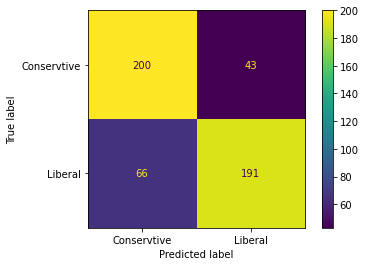

In [22]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Conservtive', 'Liberal']);

In [23]:
preds = gs.predict(X_test)

In [24]:
X_test[(y_test != preds) & (preds == 0)]

938    Insurance companies are now asking COVID-19 pa...
584    Mind Debris Magazine - Residential Schools: Ca...
275    I wanna leave India and move to some western c...
674                                  Hands-Off Patroln/a
29                  U.S. Covid Deaths Get Even Reddern/a
                             ...                        
413    I Wrote Letters to my Senators -- Spoiler: Not...
310    Joe Biden's Handlers Deliberately Cut His Live...
532    Cyber Ninjas report - early look here - confir...
765    Rep. Jim Jordan (R-OH) claims U.S. tax dollars...
408    Please consider reading and signing my petitio...
Name: title_and_st, Length: 66, dtype: object